## Goal : can we automate the process of determining the cuisine of a given recipe?

#### pandas provides two key data structures:
#### (a) DataFrame: A 2-dimensional, table-like data structure (like a spreadsheet or SQL table).
#### (b) Series: A 1-dimensional labeled array.

In [1]:
import pandas as pd 
import numpy as np 
import re

# Let's changes a display setting in pandas so that 
# all columns and rows in a DataFrame will be shown when you print it out.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Download the data from the IBM server and read it into a pandas dataframe.

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

#### Get the Basic Structure of the dataset

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57691 entries, 0 to 57690
Columns: 384 entries, country to zucchini
dtypes: object(384)
memory usage: 169.0+ MB


(57691, 384)

In [4]:
df.dtypes.value_counts()

object    384
Name: count, dtype: int64

#### View the first and last few rows with

In [5]:
df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [6]:
df.tail()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
57686,Japan,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No

### The method "DataFrame.describe()" in pandas is used to generate descriptive statistics of a DataFrame.

#### For numeric columns, it returns stats like:

count, mean, std, min, 25%, 50%, 75%, max

#### For non-numeric (object or category) columns, it returns:

count: number of non-null entries

unique: number of unique values

top: most frequent value

freq: frequency of the top value

#### Get statistical summaries

In [7]:
df.describe()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,5

##### If you want summary only for numeric columns, you can filter them
##### You will get error message if DataFrame has no numeric columns.

In [9]:
df.select_dtypes(include='number').describe()

#### Check for missing values

In [10]:
df.isnull().sum()

country                    0
almond                     0
angelica                   0
anise                      0
anise_seed                 0
apple                      0
apple_brandy               0
apricot                    0
armagnac                   0
artemisia                  0
artichoke                  0
asparagus                  0
avocado                    0
bacon                      0
baked_potato               0
balm                       0
banana                     0
barley                     0
bartlett_pear              0
basil                      0
bay                        0
bean                       0
beech                      0
beef                       0
beef_broth                 0
beef_liver                 0
beer                       0
beet                       0
bell_pepper                0
bergamot                   0
berry                      0
bitter_orange              0
black_bean                 0
black_currant              0
black_mustard_

##### If you're only interested in columns that do have missing values

In [11]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [12]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing,
    'Percent Missing': missing_percent
})
display(missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False).head(10))

,Missing Values,Percent Missing


#### Examine unique values

In [13]:
df.nunique()

country                    69
almond                      2
angelica                    2
anise                       2
anise_seed                  2
apple                       2
apple_brandy                2
apricot                     2
armagnac                    2
artemisia                   2
artichoke                   2
asparagus                   2
avocado                     2
bacon                       2
baked_potato                2
balm                        2
banana                      2
barley                      2
bartlett_pear               2
basil                       2
bay                         2
bean                        2
beech                       2
beef                        2
beef_broth                  2
beef_liver                  2
beer                        2
beet                        2
bell_pepper                 2
bergamot                    2
berry                       2
bitter_orange               2
black_bean                  2
black_curr

In [ ]:
nunique = df.nunique().sort_values(ascending=False)
print("Columns with most unique values (potential IDs or free text):")
display(nunique.head(10))
print("\nColumns with fewest unique values (likely categorical):")
display(nunique.tail(10))

#### Check if any columns appear to contain numeric data stored as strings
##### The goal of this script is to identify columns in a DataFrame that look like numeric data but are stored as strings (i.e., they have dtype == 'object')
##### For example
$$
\begin{array}{|l|l|}
\hline
\textbf{Column} & \textbf{Data} \\
\hline
\text{Age} & \text{`23'} \\
\text{Salary} & \text{`40000'} \\
\text{Code} & \text{`ABC123'} \\
\hline
\end{array}
$$
##### All are stored as type object, but '23' and '40000' could be used as numbers if cleaned.

In [14]:
def is_likely_numeric(series):
    # Sample first 100 non-null values
    sample = series.dropna().head(100)
    if len(sample) == 0:
        return False
    
    # Try to convert to numeric
    try:
        pd.to_numeric(sample)
        return True
    except:
        # If more than 80% can be converted, it's likely numeric
        try:
            success = sum(pd.to_numeric(sample, errors='coerce').notnull()) / len(sample)
            return success > 0.8
        except:
            return False

potentially_numeric = []
for col in df.columns:
    if df[col].dtype == 'object' and is_likely_numeric(df[col]):
        potentially_numeric.append(col)

print(f"Found {len(potentially_numeric)} columns that appear to contain numeric data stored as strings")
if potentially_numeric:
    print("First 10:", potentially_numeric[:10])

Found 0 columns that appear to contain numeric data stored as strings


In [ ]:
for col in potentially_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#### Value counts for first categorical-looking column 

In [18]:
display(df[df.columns[0]].value_counts().head())

country
American    40150
Mexico       1754
Italian      1715
Italy        1461
Asian        1176
Name: count, dtype: int64

In [19]:
df[df.columns[0]].value_counts()

country
American                   40150
Mexico                      1754
Italian                     1715
Italy                       1461
Asian                       1176
French                       996
east_asian                   951
Canada                       774
korean                       767
Mexican                      622
western                      450
Southern_SoulFood            346
India                        324
Jewish                       320
Spanish_Portuguese           291
Mediterranean                289
UK-and-Ireland               282
Indian                       274
France                       268
MiddleEastern                248
Central_SouthAmerican        241
Germany                      237
Eastern-Europe               235
Chinese                      226
Greek                        225
English_Scottish             204
Caribbean                    183
Thai                         164
Scandinavia                  158
EasternEuropean_Russian      146
Ca

#### Check for duplicate rows

In [17]:
dupe_count = df.duplicated().sum()
print(f"Number of duplicate rows: {dupe_count} ({dupe_count/len(df):.2%} of data)")

Number of duplicate rows: 4724 (8.19% of data)


#### Group similar column names

In [20]:
prefixes = {}
for col in df.columns:
    parts = col.split('_')
    prefix = parts[0] if len(parts) > 1 else 'other'
    if prefix not in prefixes:
        prefixes[prefix] = []
    prefixes[prefix].append(col)

# Show the most common column prefixes
prefix_counts = {k: len(v) for k, v in prefixes.items()}
top_prefixes = dict(sorted(prefix_counts.items(), key=lambda x: x[1], reverse=True)[:10])
print("Most common column name patterns:")
for prefix, count in top_prefixes.items():
    print(f"- {prefix}_* : {count} columns")

Most common column name patterns:
- other_* : 253 columns
- roasted_* : 9 columns
- black_* : 7 columns
- red_* : 4 columns
- orange_* : 3 columns
- smoked_* : 3 columns
- beef_* : 2 columns
- chicken_* : 2 columns
- corn_* : 2 columns
- grape_* : 2 columns


#### Let's check that some ingredients exist in our dataframe:

In [24]:
keywords = ['rice', 'wasabi', 'soy']

for keyword in keywords:
    matches = [col for col in df.columns if re.search(keyword, col, re.IGNORECASE)]
    print(f"Matches for '{keyword}': {matches}")


Matches for 'rice': ['brown_rice', 'licorice', 'rice']
Matches for 'wasabi': ['wasabi']
Matches for 'soy': ['soy_sauce', 'soybean', 'soybean_oil']


#### 
#### (a) Cuisine column is labeled as Country, which is inaccurate. Let's rename it.
#### (b) Make all the cuisine names lowercase.

In [29]:
df.columns = ['cuisine'] + list(df.columns[1:])
df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [32]:
## Other ways
df.rename(columns={df.columns[0]: 'cuisine'}, inplace=True)
df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [41]:
df["cuisine"] = df["cuisine"].str.lower()
(df[df.columns[0]].value_counts()).head(10)

cuisine
american      40150
italian        3250
mexican        2390
french         1264
asian          1193
east_asian      951
korean          799
canadian        774
indian          598
western         450
Name: count, dtype: int64

####
#### Make the cuisine names consistent.

In [39]:
cuisine_map = {
    "austria": "austrian",
    "belgium": "belgian",
    "china": "chinese",
    "canada": "canadian",
    "netherlands": "dutch",
    "france": "french",
    "germany": "german",
    "india": "indian",
    "indonesia": "indonesian",
    "iran": "iranian",
    "italy": "italian",
    "japan": "japanese",
    "israel": "israeli",
    "korea": "korean",
    "lebanon": "lebanese",
    "malaysia": "malaysian",
    "mexico": "mexican",
    "pakistan": "pakistani",
    "philippines": "philippine",
    "scandinavia": "scandinavian",
    "spain": "spanish_portuguese",
    "portugal": "spanish_portuguese",
    "switzerland": "swiss",
    "thailand": "thai",
    "turkey": "turkish",
    "vietnam": "vietnamese",
    "uk-and-ireland": "uk-and-irish",
    "irish": "uk-and-irish"
}

# Apply the mapping
df["cuisine"] = df["cuisine"].replace(cuisine_map)
(df[df.columns[0]].value_counts()).head(10)

cuisine
american      40150
italian        3250
mexican        2390
french         1264
asian          1193
east_asian      951
korean          799
canadian        774
indian          598
western         450
Name: count, dtype: int64

####
#### Remove cuisines with < 50 recipes.

In [46]:
# Count number of recipes per cuisine
cuisine_counts = df['cuisine'].value_counts()

# Keep only cuisines with at least 50 entries
valid_cuisines = cuisine_counts[cuisine_counts >= 50].index

rows_before = len(df)

# Filter DataFrame
df = df[df['cuisine'].isin(valid_cuisines)]

rows_after = len(df)

print(f"Rows before: {rows_before}")
print(f"Rows after: {rows_after}")
print(f"Rows removed: {rows_before - rows_after}")


Rows before: 57394
Rows after: 57394
Rows removed: 0


In [47]:
df[df.columns[0]].value_counts()

cuisine
american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
spanish_portuguese           416
uk-and-irish                 368
southern_soulfood            346
jewish                       320
japanese                     320
mediterranean                289
thai                         289
german                       289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
easterneuropean_russian      146
cajun_creole                 146
moroccan                     137
african                      115
so

####
#### Convert all Yes's to 1's and the No's to 0's

In [50]:
df = df.replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

####
#### Get the recipes that contain rice and soy and wasabi and seaweed.

In [52]:
check_recipes = df.loc[
    (df["rice"] == 1) &
    (df["soy_sauce"] == 1) &
    (df["wasabi"] == 1) &
    (df["seaweed"] == 1)
]

check_recipes


,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11306,japanese,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

####
#### (a) Let's count the ingredients across all recipes.
#### (b) Let's sort this dataframe in descending order.

In [54]:
# Sum each ingredient column (excluding the first column, which is probably a name or ID)
ingredient_counts = df.iloc[:, 1:].sum()

# Create a new DataFrame with ingredient names and their counts
ing_df = pd.DataFrame({
    "ingredient": ingredient_counts.index,
    "count": ingredient_counts.values
})

# Sort by count (highest first) and reset the index
ing_df = ing_df.sort_values("count", ascending=False).reset_index(drop=True)

# Print the result
print(ing_df)

                  ingredient  count
0                        egg  21022
1                      wheat  20775
2                     butter  20715
3                      onion  18078
4                     garlic  17351
5                       milk  12869
6              vegetable_oil  11103
7                      cream  10170
8                     tomato   9920
9                  olive_oil   9874
10              black_pepper   9825
11                    pepper   9230
12                   vanilla   9009
13                   cayenne   8253
14                   vinegar   8060
15             cane_molasses   7741
16               bell_pepper   5979
17                  cinnamon   5593
18                   parsley   5550
19                   chicken   5436
20               lemon_juice   5065
21                      beef   4902
22                      corn   4828
23                     cocoa   4798
24                  scallion   4782
25                     bread   4571
26                    ginger

####
####  let's try to find out what ingredients Chinese people typically use, and what is Canadian food for example.

In [56]:
cuisines = df.groupby("cuisine").mean()
cuisines.head(10)

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
african,0.156522,0.000000,

#### Let's print out the profile for each cuisine by displaying the top four ingredients in each cuisine.

In [62]:
num_ingredients = 5  # number of top ingredients to show

def print_top_ingredients(row):
    print(row.name.upper())  # print cuisine name in uppercase
    top = row.sort_values(ascending=False).head(num_ingredients) * 100  # top ingredients in %
    
    for ingredient, percent in top.items():
        print(f"{ingredient} ({int(percent)}%)", end=' ')
    print("\n")

# apply the function to each cuisine row
cuisines.apply(print_top_ingredients, axis=1);


AFRICAN
onion (53%) olive_oil (52%) garlic (49%) cumin (42%) cayenne (35%) 

AMERICAN
butter (41%) egg (40%) wheat (39%) onion (29%) milk (26%) 

ASIAN
soy_sauce (49%) ginger (48%) garlic (47%) rice (41%) scallion (38%) 

CAJUN_CREOLE
onion (69%) cayenne (56%) garlic (48%) butter (36%) vegetable_oil (34%) 

CANADIAN
wheat (39%) butter (38%) egg (35%) onion (34%) garlic (27%) 

CARIBBEAN
onion (51%) garlic (50%) vegetable_oil (31%) black_pepper (31%) tomato (30%) 

CENTRAL_SOUTHAMERICAN
garlic (56%) onion (54%) cayenne (51%) tomato (41%) corn (32%) 

CHINESE
soy_sauce (68%) ginger (53%) garlic (52%) scallion (48%) sesame_oil (39%) 

EAST_ASIAN
garlic (55%) soy_sauce (50%) scallion (49%) cayenne (47%) sesame_oil (39%) 

EASTERN-EUROPE
wheat (53%) egg (52%) butter (48%) onion (45%) milk (27%) 

EASTERNEUROPEAN_RUSSIAN
butter (60%) egg (50%) wheat (49%) onion (38%) cream (33%) 

ENGLISH_SCOTTISH
butter (67%) wheat (62%) egg (53%) cream (41%) milk (35%) 

FRENCH
butter (50%) egg (44%) wheat

## Some Other things can be done : Dont run it

In [64]:
# Convert object columns that should be numeric
for col in potentially_numeric:  # From your earlier analysis
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
# For columns with high missing percentages:
df = df.dropna(thresh=len(df)*0.5, axis=1)  # Drop columns with >50% missing

# For remaining missing values, choose appropriate strategy:
# - Numeric columns: mean, median, or 0
# - Categorical: mode or 'Unknown'
df = df.fillna(df.mean(numeric_only=True))  # For numeric columns
df = df.fillna('Unknown')  # For object columns

# Convert low-cardinality columns to categorical type
for col in df.select_dtypes(['object']).columns:
    if df[col].nunique() < 50:  # Adjust threshold as needed
        df[col] = df[col].astype('category')


# Identify correlated numeric features
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    corr = numeric_df.corr()
    
    # Identify highly correlated pairs (>0.9)
    high_corr = np.where(np.abs(corr) > 0.9)
    high_corr_pairs = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
    
    # Print and possibly drop one from each pair
    print("Highly correlated features:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {corr.loc[pair[0], pair[1]]:.2f}")


TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

## Model training

In [67]:
df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

### Decision Tree 1

In [78]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import itertools

In [72]:
# Filter only selected Asian/Indian cuisines
selected_df = df[df["cuisine"].isin(["korean", "japanese", "chinese", "thai", "indian"])]

# Split features and labels
X = selected_df.iloc[:, 1:]          # ingredients
y = selected_df["cuisine"]           # target: cuisine labels

# Train a decision tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

print("Model trained and saved to 'model'.")

Model trained and saved to 'model'.


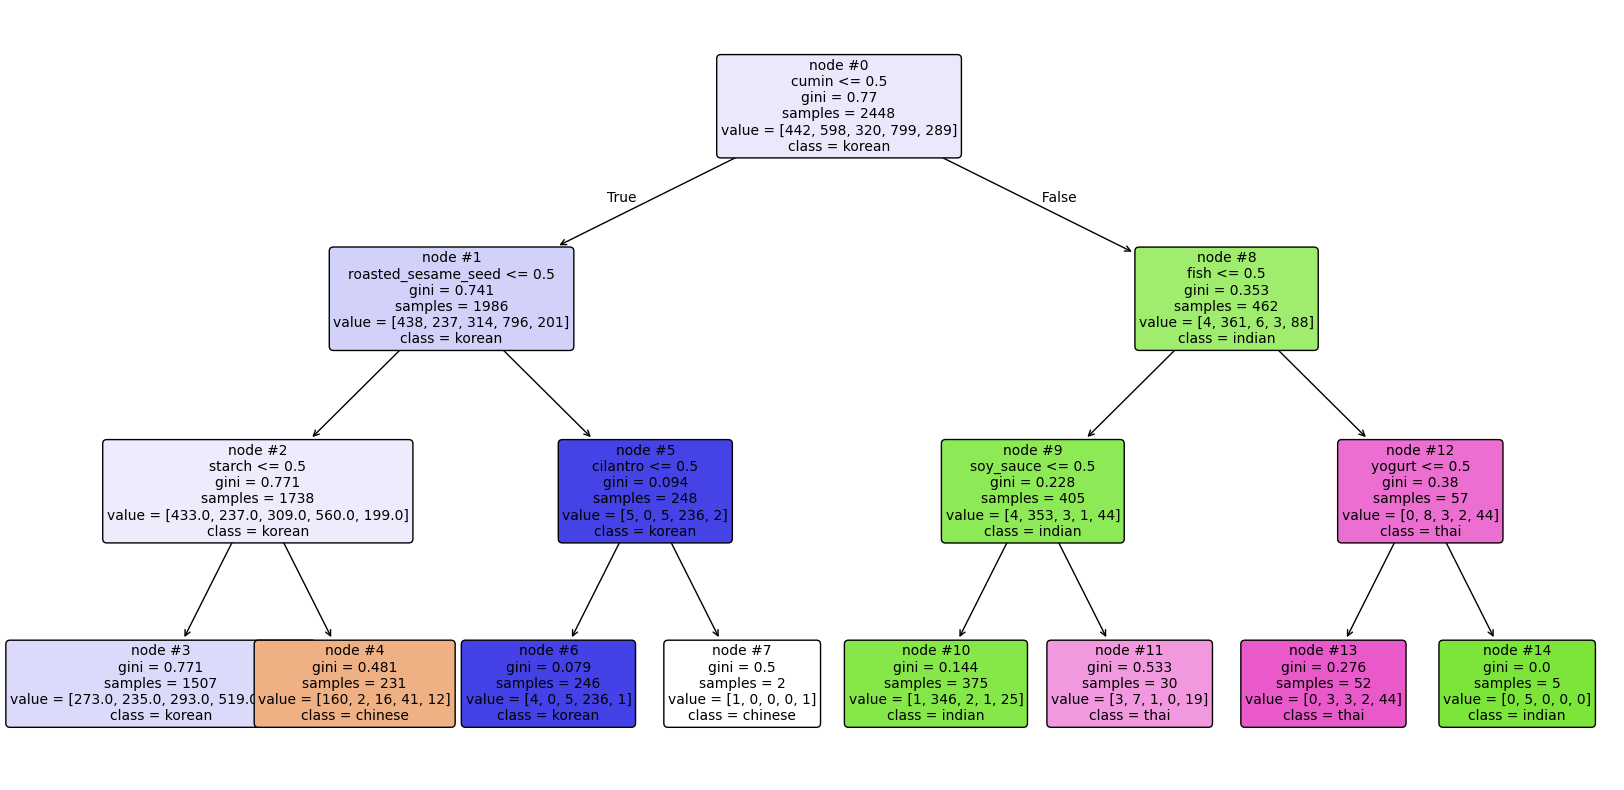

In [77]:
plt.figure(figsize=(20, 10))  # adjust size as needed
_=tree.plot_tree(
    model, 
    feature_names=X.columns,      # ingredient names
    class_names=model.classes_,   # cuisine labels
    filled=True, 
    rounded=True, 
    node_ids=True,
    fontsize=10,
    label='all'
)
plt.show()

In [84]:
# Filter only selected Asian/Indian cuisines
selected_df = df[df["cuisine"].isin(["korean", "japanese", "chinese", "thai", "indian"])]

# Split features and labels
X = selected_df.iloc[:, 1:]          # ingredients
y = selected_df["cuisine"]           # target: cuisine labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(max_depth=15)
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Model Performance:\n")
print(classification_report(y_test, y_pred))

Model Performance:

              precision    recall  f1-score   support

     chinese       0.69      0.60      0.64       145
      indian       0.68      0.93      0.79       177
    japanese       0.53      0.53      0.53        88
      korean       0.78      0.75      0.77       229
        thai       0.77      0.48      0.59        96

    accuracy                           0.70       735
   macro avg       0.69      0.66      0.66       735
weighted avg       0.71      0.70      0.70       735



<Figure size 800x600 with 0 Axes>

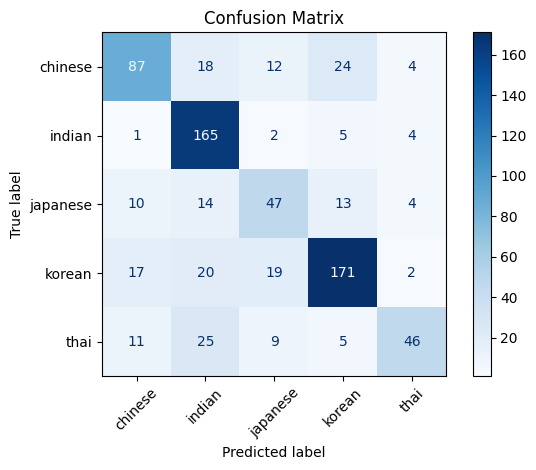

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 7: Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Step 8: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Decision tree model saved to 'model'!


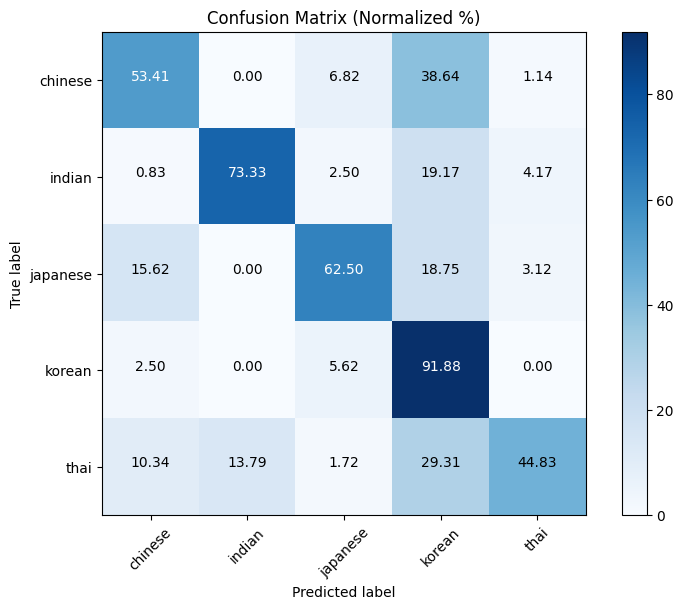

In [87]:
# Step 1: Filter only Asian/Indian cuisines
bamboo = df[df["cuisine"].isin(["korean", "japanese", "chinese", "thai", "indian"])]

# Step 2: Split into features and labels
X = bamboo.iloc[:, 1:]      # ingredients
y = bamboo["cuisine"]       # cuisine labels

# Step 3: Split into train and test sets (stratified to balance cuisines)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234, stratify=y
)

# Step 4: Train the decision tree
model = DecisionTreeClassifier(max_depth=15)
model.fit(X_train, y_train)

print("Decision tree model saved to 'model'!")

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Create normalized confusion matrix
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_normalized = (cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]) * 100

# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Normalized %)")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Add value labels inside the matrix
fmt = ".2f"
thresh = cm_normalized.max() / 2.
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], fmt),
             ha="center", color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


### Decision tree 2

In [120]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import tree
import seaborn as sns

import graphviz
from matplotlib.colors import ListedColormap
import pydotplus


Cuisine distribution:
cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


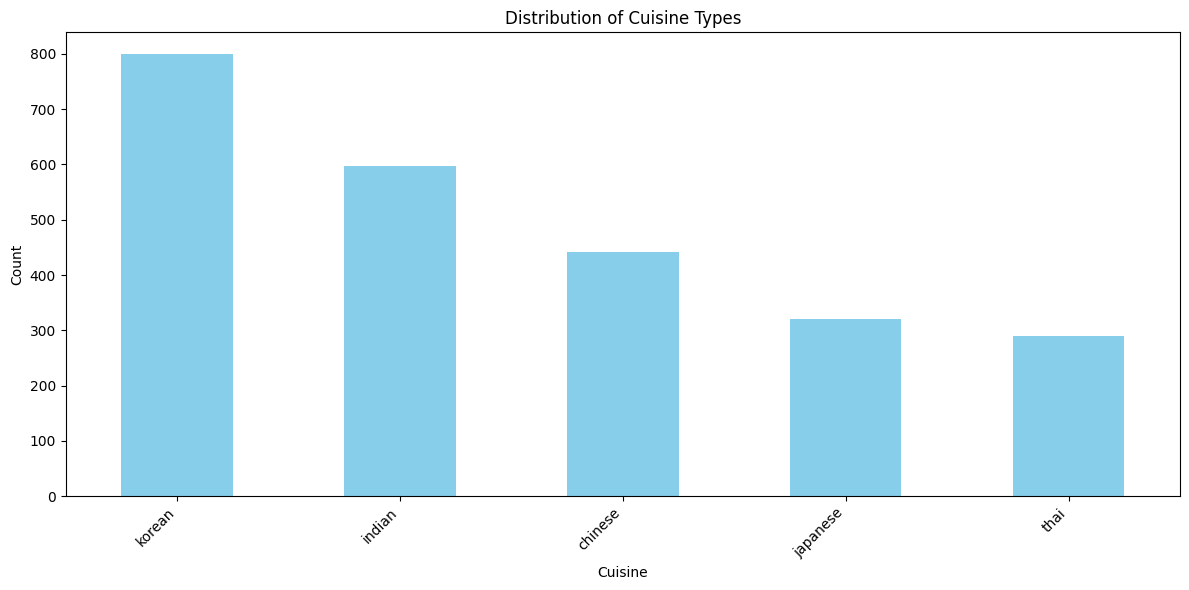


Training set shape: (1958, 383)
Test set shape: (490, 383)


In [94]:
selected_df = df[df["cuisine"].isin(["korean", "japanese", "chinese", "thai", "indian"])]
# Extract features (X) and target (y)
X = selected_df.drop('cuisine', axis=1)  # Features (ingredients)
y = selected_df['cuisine'].astype(str)    # Target (cuisine types)

# Check class distribution
cuisine_counts = y.value_counts()
print("\nCuisine distribution:")
print(cuisine_counts)

# Visualize class distribution
plt.figure(figsize=(12, 6))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

#### Basic Decision tree model

In [102]:
# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=15)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Basic evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.6816

Classification Report:
              precision    recall  f1-score   support

     chinese       0.51      0.48      0.49        88
      indian       0.72      0.96      0.82       120
    japanese       0.54      0.59      0.57        64
      korean       0.81      0.68      0.74       160
        thai       0.68      0.52      0.59        58

    accuracy                           0.68       490
   macro avg       0.65      0.65      0.64       490
weighted avg       0.68      0.68      0.68       490



In [106]:

plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, 
            yticklabels=dt_classifier.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


"\nplt.figure(figsize=(8, 8))\ncm = confusion_matrix(y_test, y_pred)\nsns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, \n            yticklabels=dt_classifier.classes_)\nplt.title('Confusion Matrix')\nplt.ylabel('True Label')\nplt.xlabel('Predicted Label')\nplt.xticks(rotation=45, ha='right')\nplt.tight_layout()\nplt.show()\n"

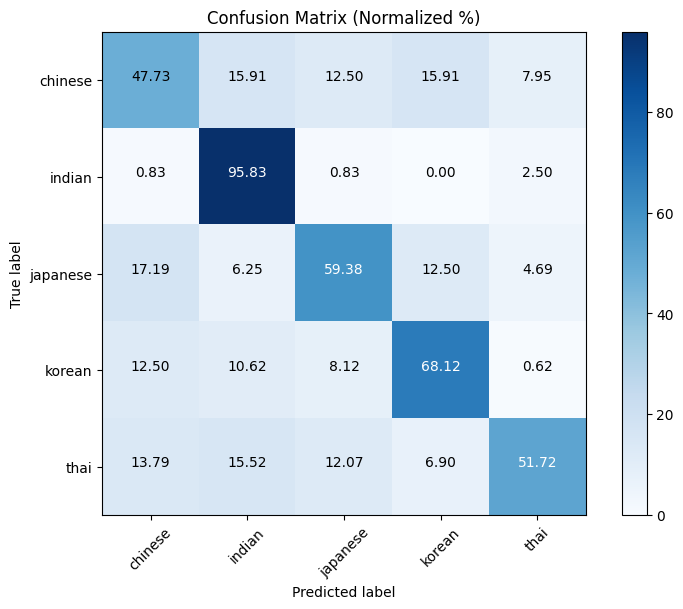

In [107]:
# Step 6: Create normalized confusion matrix
labels = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_normalized = (cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]) * 100

# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm_normalized, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Normalized %)")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

# Add value labels inside the matrix
fmt = ".2f"
thresh = cm_normalized.max() / 2.
for i, j in itertools.product(range(cm_normalized.shape[0]), range(cm_normalized.shape[1])):
    plt.text(j, i, format(cm_normalized[i, j], fmt),
             ha="center", color="white" if cm_normalized[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

#### Cross-validation to ensure model stability

In [108]:
cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-validation scores: [0.66938776 0.64693878 0.70612245 0.6605317  0.67893661]
Mean CV accuracy: 0.6724 ± 0.0199


#### Learning curve to detect overfitting

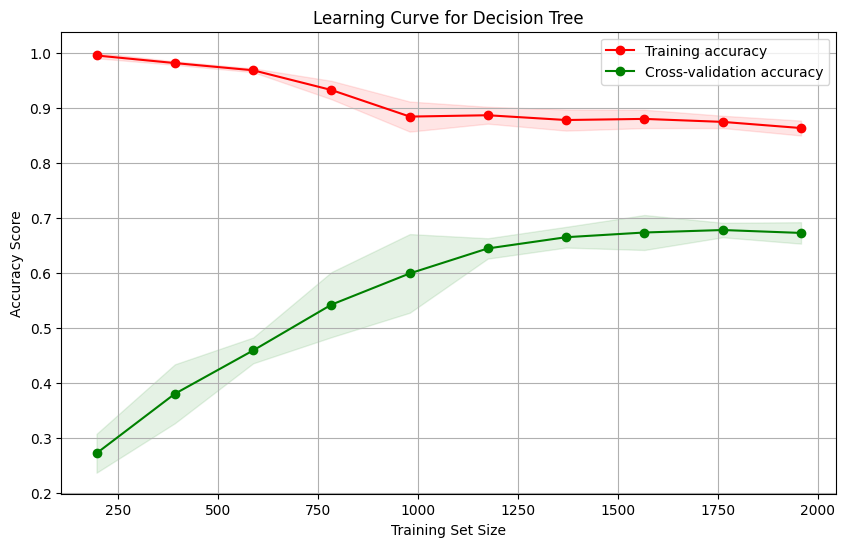

In [109]:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    dt_classifier, X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve for Decision Tree')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Red Line - Training Accuracy
- Starts near $100 \%$ for small training sizes.
- Gradually drops and stabilizes around 88\% as more data is added.
- This indicates that the model fits the training data extremely well, especially with small data - a sign of overfitting.

Green Line - Cross-Validation Accuracy
- Starts low ( $\sim 27 \%$ ) with small data.
- Increases as training size grows, and plateaus around 68\%.
- This represents model performance on unseen data.
vs Gap Between CV and Training Accuracy
- A large gap means overfitting: the model learns the training data too well but struggles to generalize.
- Even as training size increases, the gap persists - the training accuracy remains high while CV accuracy is significantly lower.
- This indicates the Decision Tree is too complex and memorizes the training data instead of learning general patterns.

#### Hyperparameter Tuning

In [110]:
# Define parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score: 0.7068


In [111]:
# Train model with best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate optimized model
y_pred_best = best_dt.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Optimized Decision Tree Accuracy: {accuracy_best:.4f}")
print("\nClassification Report for Optimized Model:")
print(classification_report(y_test, y_pred_best))

# Compare with original model
print("\nAccuracy improvement: {:.4f} ({:.2f}%)".format(
    accuracy_best - accuracy, 
    100 * (accuracy_best - accuracy) / accuracy
))

Optimized Decision Tree Accuracy: 0.7204

Classification Report for Optimized Model:
              precision    recall  f1-score   support

     chinese       0.56      0.55      0.55        88
      indian       0.86      0.94      0.90       120
    japanese       0.60      0.61      0.60        64
      korean       0.77      0.74      0.75       160
        thai       0.66      0.60      0.63        58

    accuracy                           0.72       490
   macro avg       0.69      0.69      0.69       490
weighted avg       0.72      0.72      0.72       490


Accuracy improvement: 0.0388 (5.69%)


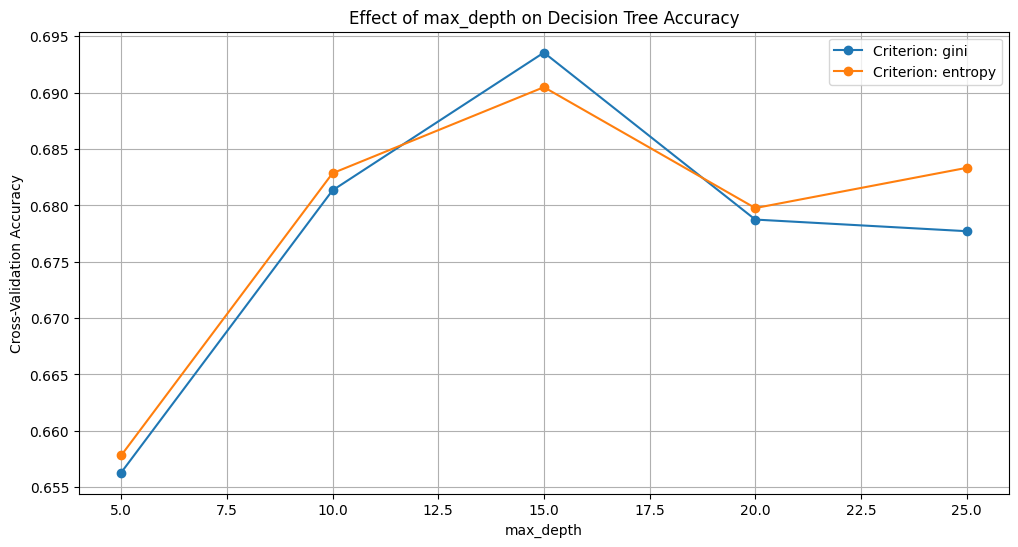

In [112]:
# Visualize hyperparameter importance
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(len(param_grid['max_depth']), 
                                                   len(param_grid['min_samples_split']),
                                                   len(param_grid['min_samples_leaf']),
                                                   len(param_grid['criterion']))

# Plot max_depth vs accuracy for different criteria
plt.figure(figsize=(12, 6))
for i, criterion in enumerate(param_grid['criterion']):
    plt.plot(param_grid['max_depth'], 
             scores[:, 0, 0, i], 
             'o-', 
             label=f'Criterion: {criterion}')
    
plt.title('Effect of max_depth on Decision Tree Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Decision Tree Visualization

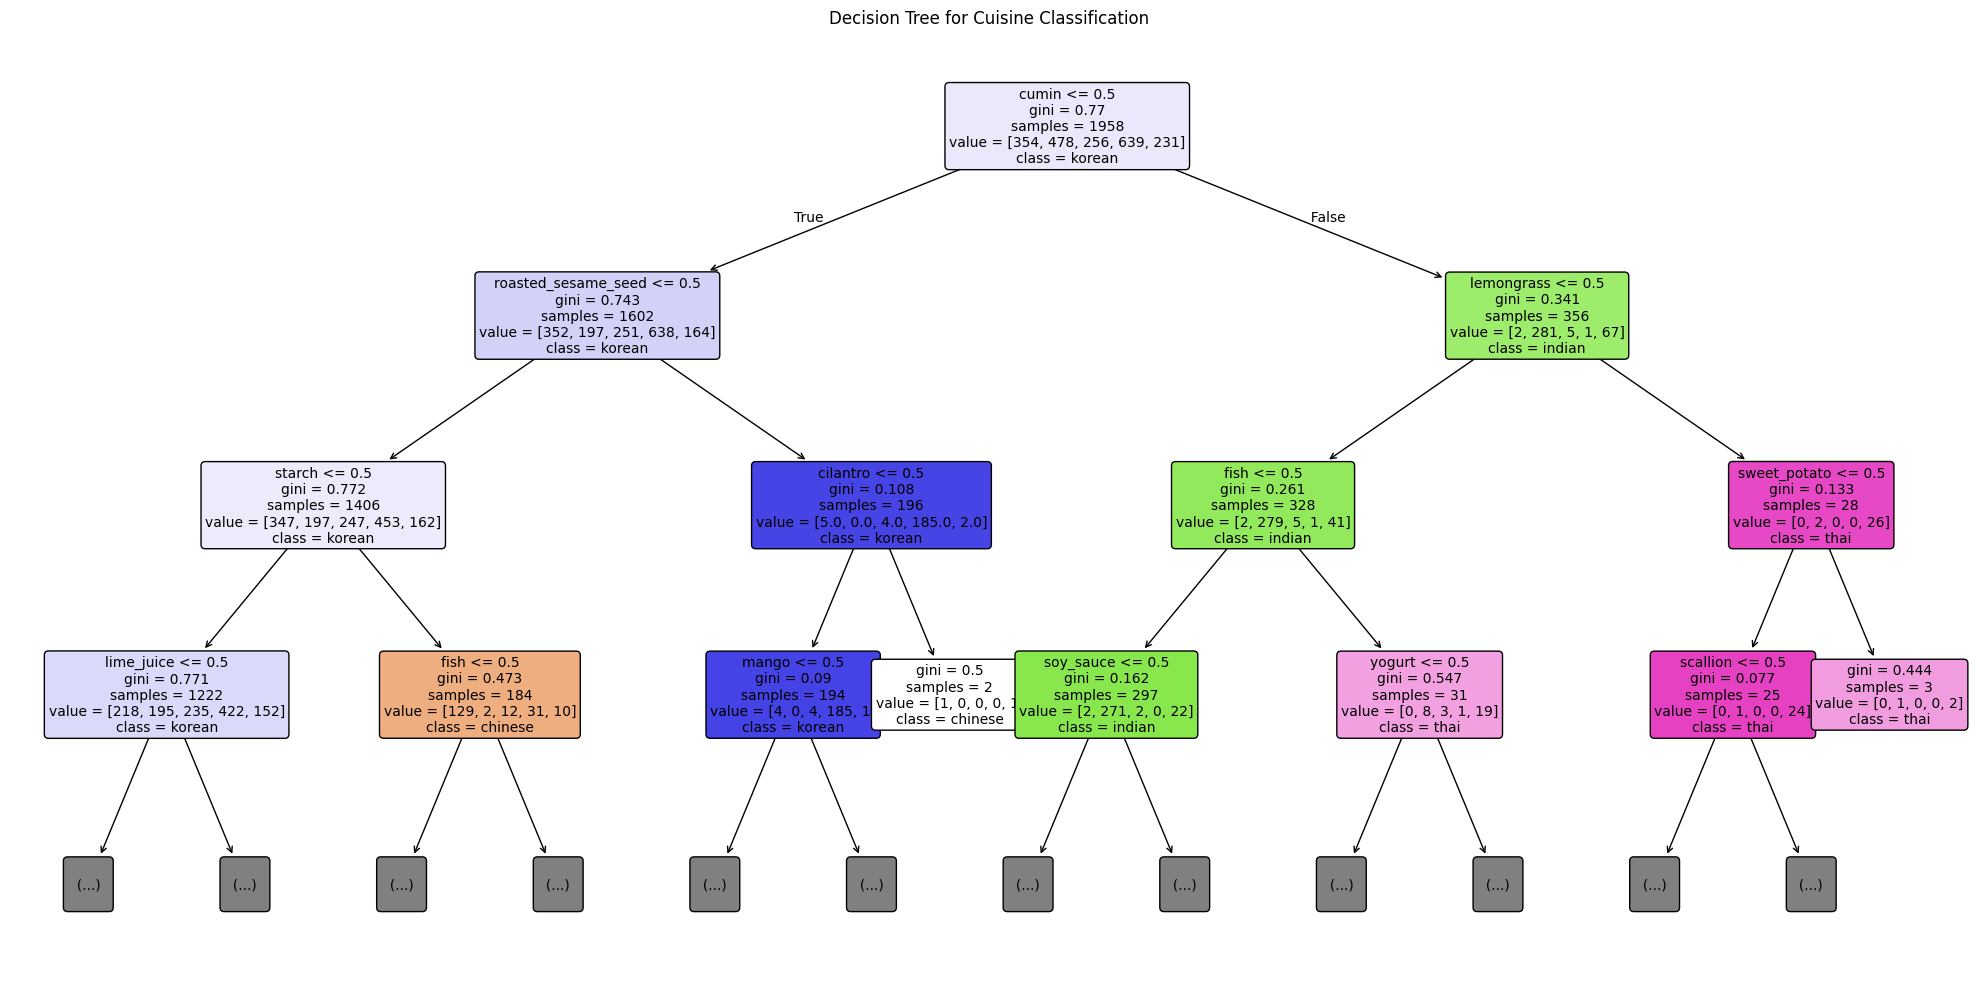

In [125]:
# Get feature names (ingredients)
feature_names = X.columns.tolist()


# For a more compact representation, we can also use matplotlib
plt.figure(figsize=(20, 10))
tree.plot_tree(best_dt, 
               feature_names=feature_names, 
               class_names=class_names,
               filled=True, 
               rounded=True,
               max_depth=3,
               fontsize=10)
plt.title('Decision Tree for Cuisine Classification')
plt.tight_layout()
plt.show()

#### Feature Importance Analysis

Feature ranking:
1. cumin (0.1531)
2. roasted_sesame_seed (0.0658)
3. starch (0.0435)
4. fish (0.0394)
5. soy_sauce (0.0370)
6. lime_juice (0.0344)
7. lemongrass (0.0334)
8. cilantro (0.0312)
9. cayenne (0.0274)
10. scallion (0.0257)
11. garlic (0.0210)
12. black_pepper (0.0196)
13. yogurt (0.0186)
14. pork (0.0174)
15. soybean (0.0171)
16. pepper (0.0170)
17. peanut_butter (0.0150)
18. seaweed (0.0146)
19. sesame_seed (0.0129)
20. turmeric (0.0123)


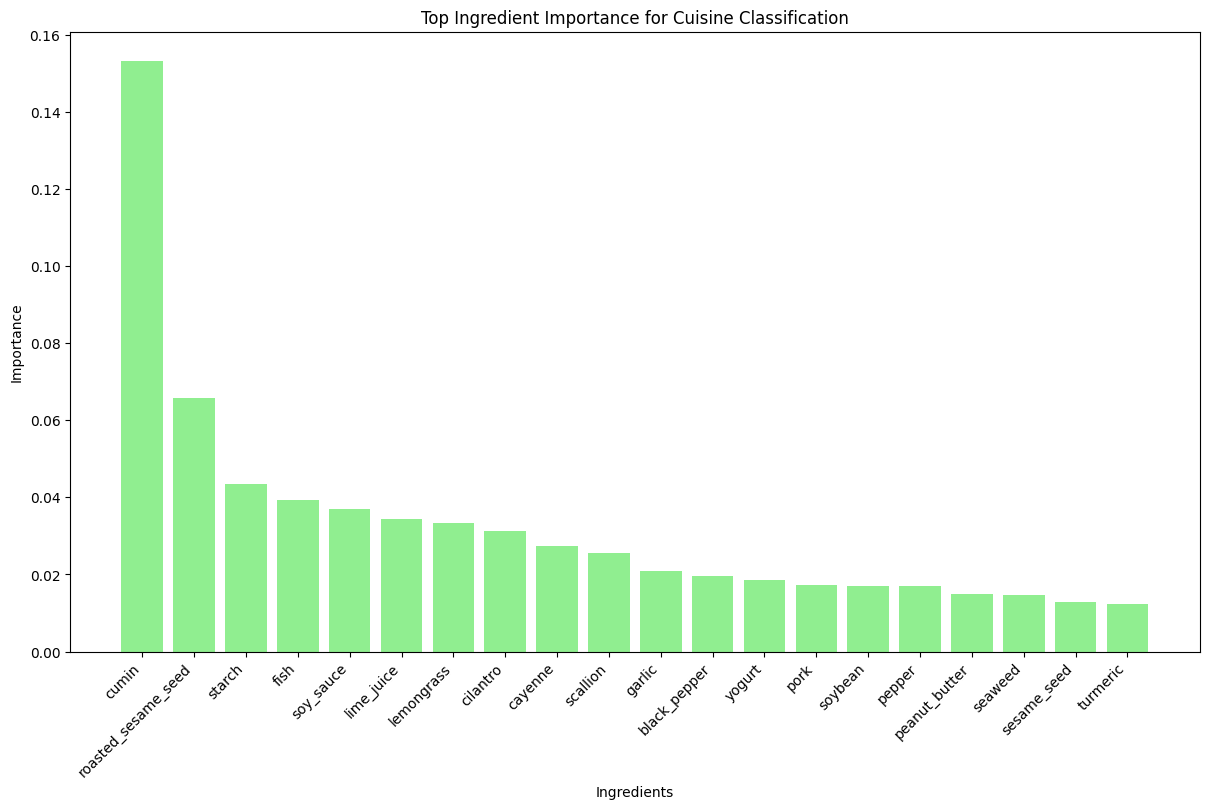

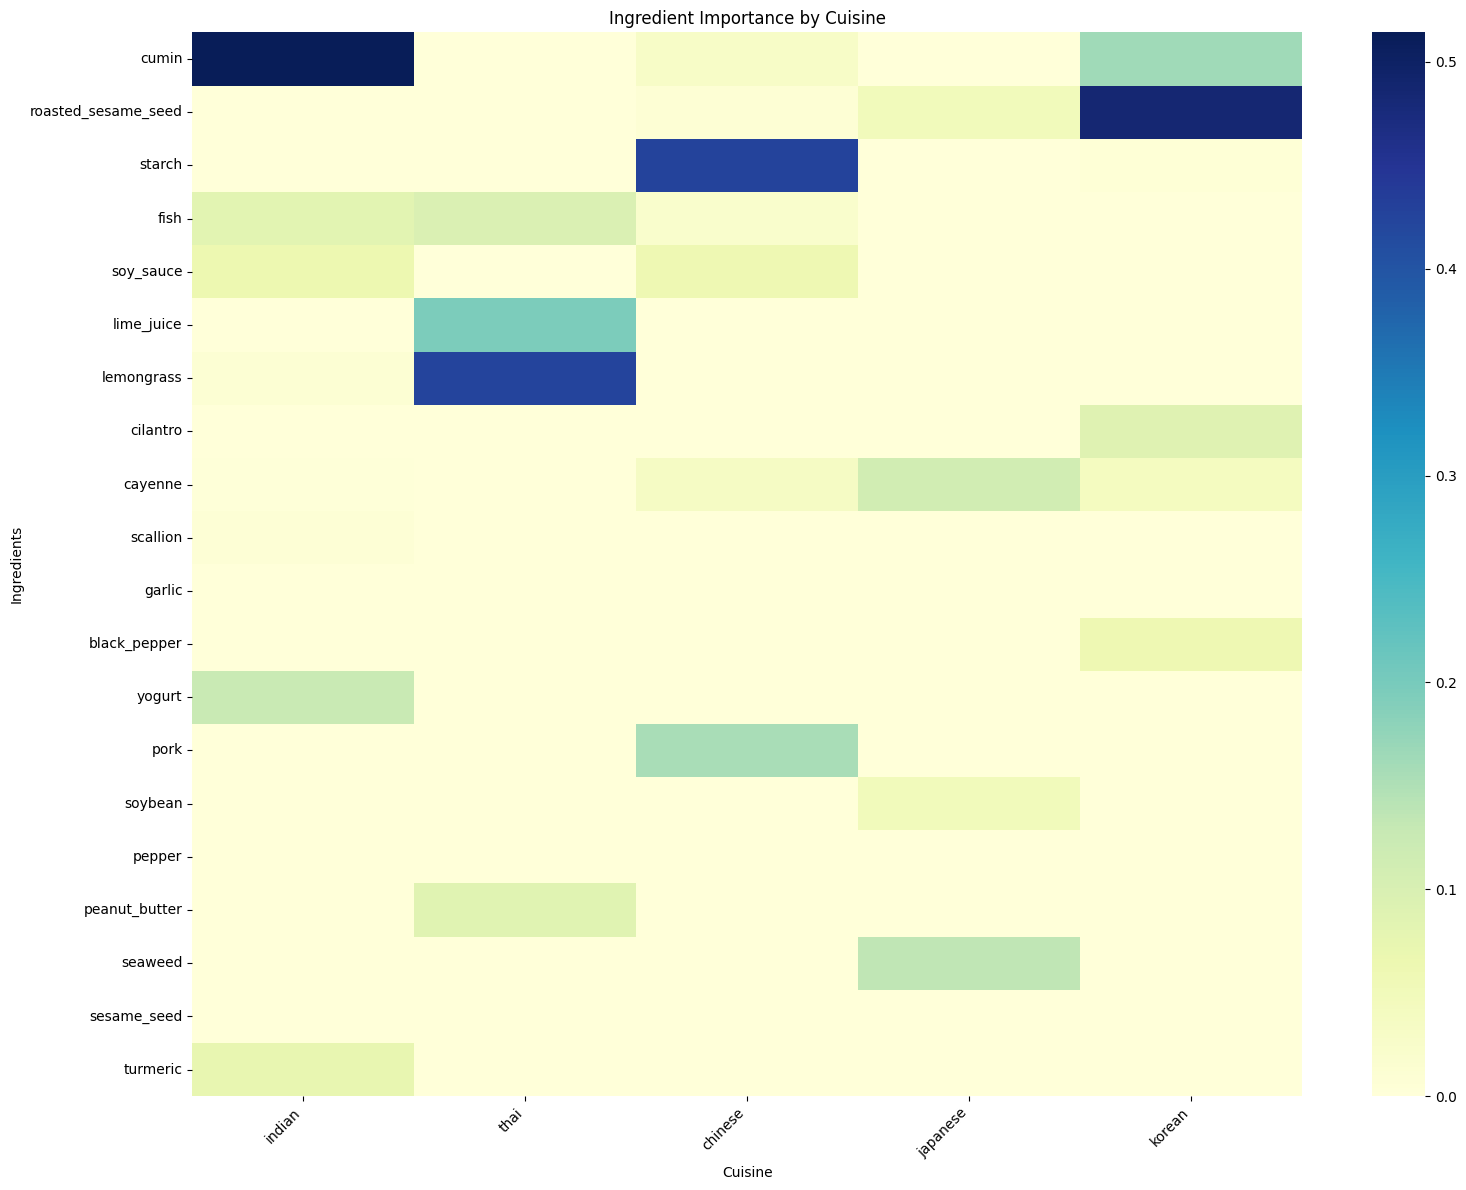

In [126]:
# Get feature importances
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(min(20, X.shape[1])):  # Print top 20 features or all if less than 20
    print(f"{f+1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

# Visualize feature importances
plt.figure(figsize=(12, 8))
top_k = 20  # Show top 20 features
plt.title('Top Ingredient Importance for Cuisine Classification')
plt.bar(range(top_k), importances[indices[:top_k]], align='center', color='lightgreen')
plt.xticks(range(top_k), [feature_names[i] for i in indices[:top_k]], rotation=45, ha='right')
plt.tight_layout()
plt.xlabel('Ingredients')
plt.ylabel('Importance')
plt.show()

# Calculate feature importance per cuisine
def get_cuisine_specific_importance(model, X, y):
    """Calculate feature importance for each cuisine."""
    cuisines = y.unique()
    importance_df = pd.DataFrame(index=X.columns)
    
    for cuisine in cuisines:
        # Create binary target: 1 for the specific cuisine, 0 for others
        y_binary = (y == cuisine).astype(int)
        
        # Train a decision tree for this cuisine
        cuisine_model = DecisionTreeClassifier(max_depth=5, random_state=42)
        cuisine_model.fit(X, y_binary)
        
        # Store feature importances
        importance_df[cuisine] = cuisine_model.feature_importances_
    
    return importance_df

# Get cuisine-specific importances
cuisine_importances = get_cuisine_specific_importance(best_dt, X, y)

# Plot heatmap of cuisine-specific feature importance
plt.figure(figsize=(16, 12))
# Select top ingredients by overall importance
top_ingredients = [feature_names[i] for i in indices[:20]]
sns.heatmap(cuisine_importances.loc[top_ingredients], cmap='YlGnBu', annot=False)
plt.title('Ingredient Importance by Cuisine')
plt.ylabel('Ingredients')
plt.xlabel('Cuisine')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Advanced Analysis Techniques

C:\Users\HP\AppData\Local\Temp\ipykernel_26508\2970418989.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=cmap_bold(i), edgecolor='k', s=20, label=cuisine)


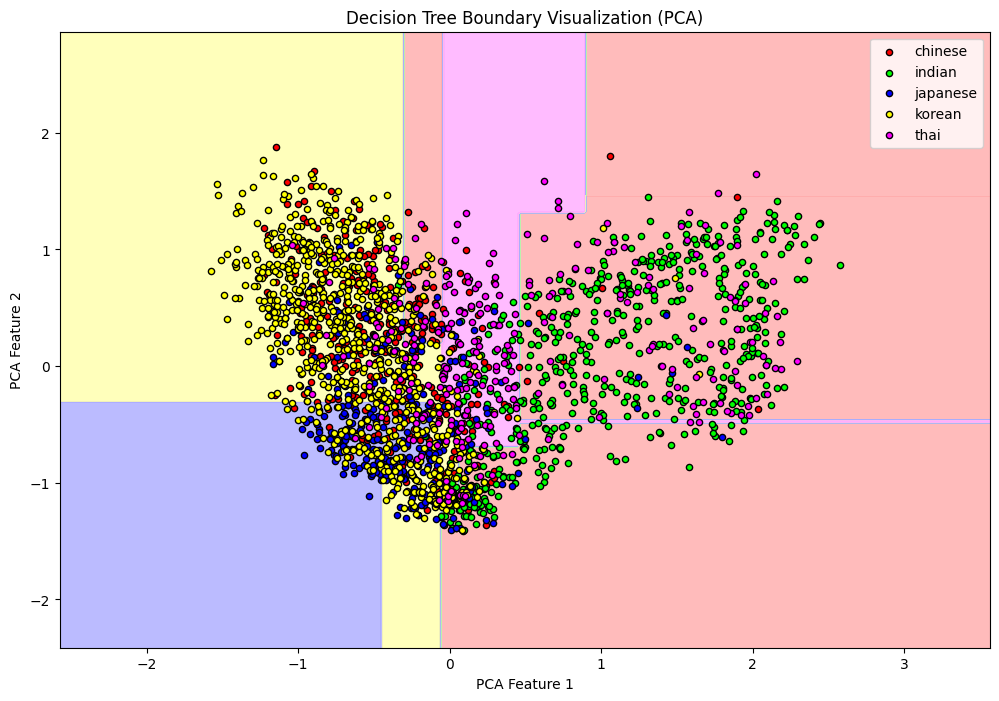

In [129]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# PCA transform
X_pca = pca.fit_transform(X)
pca_tree.fit(X_pca, y)

# Mesh grid
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict & transform labels
Z_flat = pca_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_encoded = le.transform(Z_flat)
Z_encoded = Z_encoded.reshape(xx.shape)

# Color maps
n_classes = len(np.unique(y_encoded))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF', '#AAFFFF'][:n_classes])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF'][:n_classes])

# Plot
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z_encoded, cmap=cmap_light, alpha=0.8)

for i, cuisine in enumerate(le.classes_):
    idx = np.where(y_encoded == i)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=cmap_bold(i), edgecolor='k', s=20, label=cuisine)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision Tree Boundary Visualization (PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


#### Final Model Implementation

In [131]:
# 1. Prepare final model with best parameters
final_model = DecisionTreeClassifier(
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    criterion=grid_search.best_params_['criterion'],
    random_state=42
)

# 2. Train on full dataset
final_model.fit(X, y)

# 3. Function for cuisine prediction
def predict_cuisine(ingredient_list, model, feature_names):
    """
    Predict cuisine based on a list of ingredients
    
    Parameters:
    -----------
    ingredient_list : list
        List of ingredients present in the recipe
    model : DecisionTreeClassifier
        Trained decision tree model
    feature_names : list
        List of all possible ingredients (features)
        
    Returns:
    --------
    str
        Predicted cuisine
    """
    # Create a binary feature vector
    features = np.zeros(len(feature_names))
    
    # Set present ingredients to 1
    for ingredient in ingredient_list:
        if ingredient in feature_names:
            idx = feature_names.index(ingredient)
            features[idx] = 1
    
    # Reshape for prediction
    features = features.reshape(1, -1)
    
    # Predict cuisine
    prediction = model.predict(features)[0]
    
    # Get probability scores
    probabilities = model.predict_proba(features)[0]
    cuisine_probs = {cuisine: prob for cuisine, prob in zip(model.classes_, probabilities)}
    
    return prediction, cuisine_probs

# Example usage
example_ingredients = ['rice', 'soy_sauce', 'ginger', 'garlic']
predicted_cuisine, cuisine_probs = predict_cuisine(example_ingredients, final_model, feature_names)

print(f"Ingredients: {example_ingredients}")
print(f"Predicted cuisine: {predicted_cuisine}")
print("Cuisine probabilities:")
for cuisine, prob in sorted(cuisine_probs.items(), key=lambda x: x[1], reverse=True):
    print(f"  {cuisine}: {prob:.4f}")

# 4. Save model for future use
import joblib

# Save model
joblib.dump(final_model, 'cuisine_dt_classifier.pkl')

# Save feature names
with open('feature_names.pkl', 'wb') as f:
    joblib.dump(feature_names, f)

print("\nModel and feature names saved successfully!")

Ingredients: ['rice', 'soy_sauce', 'ginger', 'garlic']
Predicted cuisine: chinese
Cuisine probabilities:
  chinese: 1.0000
  indian: 0.0000
  japanese: 0.0000
  korean: 0.0000
  thai: 0.0000

Model and feature names saved successfully!


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
